# Apples or Oranges? An image classification CNN
#### Following the official tensorflow tutorial http://bit.ly/39Tpvvx
For more detailed information about the workings of CNNs, check out my medium article: 

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import TensorBoard
import os
import numpy as np
import matplotlib.pyplot as plt
import time

## Understanding the data
 - Setting up directories
 - Understanding the distribution
 - Defining some model parameters
 - The original image was 322x480, scaled down for sake of training speed

In [3]:
PATH = r'C:\Dron\Code\fruit'
orange_path = os.path.join(PATH,'Orange')
apple_path = os.path.join(PATH, 'Apple')

orange_samples = len(os.listdir(orange_path))
apple_samples = len(os.listdir(apple_path))
total_train = round((orange_samples + apple_samples)*0.9 + 1)
total_validation = round((orange_samples + apple_samples)*0.1 - 1)
print(total_train, total_validation)

batch_size = 32
epochs = 5
IMG_HEIGHT = 64
IMG_WIDTH = 96

7233 803


## Input Pipeline
 - The original tutorial adds augmentation, but for the sake of scale I did not add that
 - Potential improvement point: add various transformations to increase sample size

In [4]:
image_generator = ImageDataGenerator(rescale=1./255, validation_split=0.1)
train_data_gen = image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=PATH,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary',
                                                          subset='training')
val_data_gen = image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=PATH,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary',
                                                             subset='validation')

Found 7233 images belonging to 2 classes.
Found 803 images belonging to 2 classes.


In [5]:
sample_training_images, _ = next(train_data_gen)

In [6]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

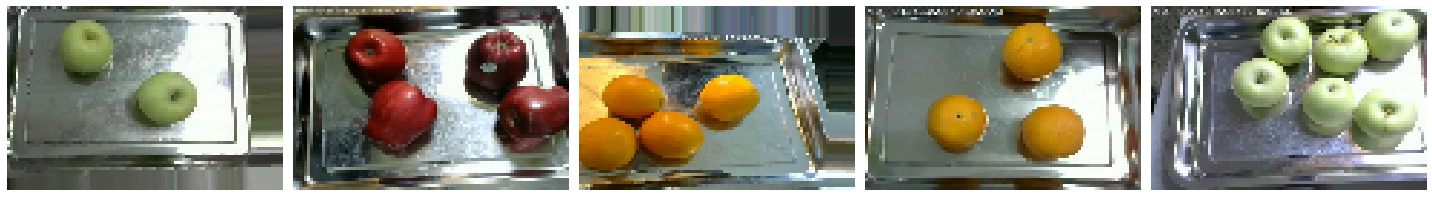

In [7]:
plotImages(sample_training_images)

2-conv-1-dense
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 226 steps, validate for 25 steps
Epoch 1/5
226/226 [==============================] - 162s 717ms/step - loss: 0.1104 - accuracy: 0.9467 - val_loss: 0.0084 - val_accuracy: 0.9987
Epoch 2/5
226/226 [==============================] - 158s 700ms/step - loss: 0.0067 - accuracy: 0.9979 - val_loss: 0.0026 - val_accuracy: 0.9987
Epoch 3/5
226/226 [==============================] - 145s 642ms/step - loss: 0.0064 - accuracy: 0.9978 - val_loss: 0.3762 - val_accuracy: 0.8875
Epoch 4/5
226/226 [==============================] - 216s 958ms/step - loss: 0.0034 - accuracy: 0.9992 - val_loss: 0.0020 - val_accuracy: 0.9987
Epoch 5/5
226/226 [==============================] - 180s 796ms/step - loss: 0.0046 - accuracy: 0.9986 - val_loss: 5.6147e-04 - val_accuracy: 1.0000
3-conv-1-dense
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 226 steps, validate for 25 steps
Epoch 1/5
226/226 [==============================] - 20

Text(0, 0.5, 'Validation Loss')

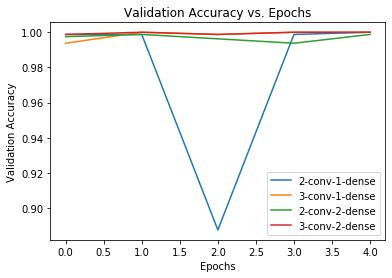

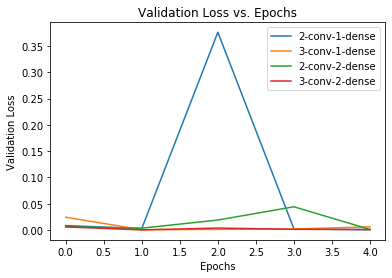

In [8]:
dense_layers = [1, 2]
conv_layers = [2, 3]

fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()

for dense_layer in dense_layers:
    for conv_layer in conv_layers:
        NAME = f"{conv_layer}-conv-{dense_layer}-dense"
        print(NAME)
        tensorboard = TensorBoard(log_dir='logs\\{}'.format(NAME))
        model = Sequential()

        model.add(Conv2D(128, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
        model.add(MaxPooling2D())

        for l in range(conv_layer-1):
            model.add(Conv2D(128, 3, padding='same', activation='relu'))
            model.add(MaxPooling2D())

        model.add(Flatten())
        for l in range(dense_layer-1):
            model.add(Dense(512, activation='relu'))
        model.add(Dense(1))

        model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])
        history = model.fit(
            train_data_gen,
            steps_per_epoch=total_train // batch_size,
            epochs=epochs,
            validation_data=val_data_gen,
            validation_steps=total_validation // batch_size,
            callbacks=[tensorboard]
        )
        acc = history.history['accuracy']
        val_acc = history.history['val_accuracy']

        loss=history.history['loss']
        val_loss=history.history['val_loss']

        epochs_range = range(epochs)

        ax1.plot(epochs_range, val_acc, label=NAME)

        ax2.plot(epochs_range, val_loss, label=NAME)
            
ax1.legend(loc='lower right')
ax1.set_title("Validation Accuracy vs. Epochs")
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Validation Accuracy')

ax2.legend(loc='upper right')
ax2.set_title("Validation Loss vs. Epochs")
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Validation Loss')
                

In [11]:
fig1.savefig(r'C:\Dron\Code\val_acc.png')
fig2.savefig(r'C:\Dron\Code\val_loss.png')

Based on the graphs, the model of choice seems to be the one with 3 convolutions and 2 Dense layers (conveniently the last model to be trained).

In [12]:
model.save(os.path.join(r'C:\Dron\Code', NAME))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: C:\Dron\Code\3-conv-2-dense\assets
